In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import torch as pt

In [86]:
def gen_t(res=1e-3):
    t = np.arange(0, 1+res, res)
    return t

In [452]:
def spline_points(points, res):
    t = np.arange(0,1+res,res)[np.newaxis,:]
    curve = [lerp(points[i-1], points[i], t) for i in range(1, len(points))]
    while len(curve) > 1:
        curve = [lerp(curve[i-1], curve[i], t) for i in range(1, len(curve))]
    spline = curve[0]
    return spline

In [176]:
def lerp(start, end, t):
    if len(start.shape) == 1: start = start[:,np.newaxis]
    if len(end.shape) == 1: end = end[:,np.newaxis]
    if len(t.shape) == 1: t = t[np.newaxis,:]
    
    vals = start + ((end-start) * t)
    return vals

In [466]:
spline_count = 5
points = np.random.uniform(size=(spline_count+2, 2))
x, y = spline_points(points, 1e-2)

(0.0, 1.0)

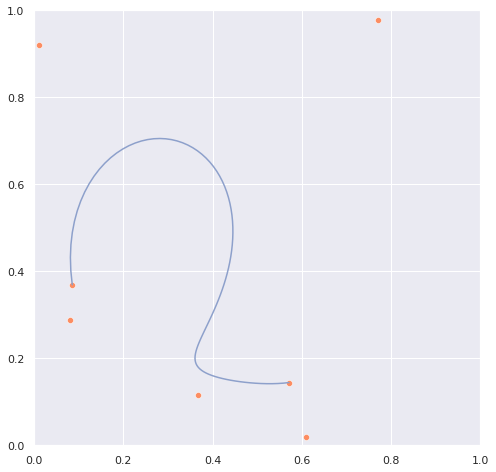

In [467]:
plt.figure(figsize=(8,8))
sns.lineplot(x=x, y=y, color='#8da0cb', sort=False)
sns.scatterplot(x=points[:,0], y=points[:,1], color='#fc8d62')
plt.xlim(0, 1)
plt.ylim(0, 1)